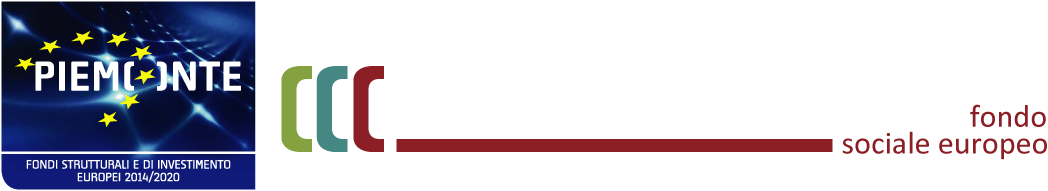





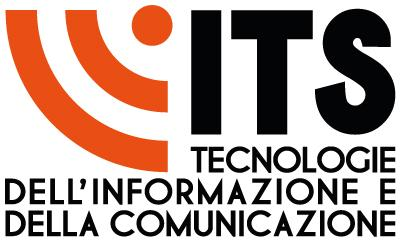




**Unità Formativa (UF):** AI e Machine Learning - Python

**Docente:** Fabio Giuseppe Antonio Gagliardi

**Titolo argomento:** esame di metà corso


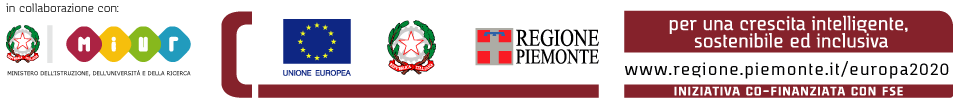



---



NOME: Stefano

\

COGNOME: Prato



---



# **REGOLE ESAME**

* **Commentare i passaggi importanti. Nello specifico:**
  *  **a cosa serve un blocco di codice, una classe o una funzione**
  *  **motivare le scelte effettuate nel codice.**

  * **L'ASSENZA DI COMMENTI SARÀ VALUTATA NEGATIVAMENTE**
  * **QUALORA DUE O PIÙ PROVE DOVESSERO RIPORTARE GLI STESSI COMMENTI E LO STESSO CODICE, SARANNO TUTT VALUTATE CON IL VOTO MINIMO.**

  es.

```
# Ho creato una classe Foo per questo motivo ...
# Funzione per calcolare ...
# Ho optato per questa soluzione piuttosto che ....
```

\

* **I dati devono obbligatoriamente essere caricati dall' url fornito su questo documento. Il caricamento dal drive locale dello studente verrà valutato negativamente.**

\

* **È richiesta la stesura di una legenda in quei grafici in cui non è chiara l'associazione della rappresentazione scelta con il dato.**

\

* **Si è liberi di utilizzare qualisasi strumento per rispondere alle richieste.
  Tuttavia si chiede di ricopiare in queso Notebook le risposte.
  Tutti i punti devono essere eseguiti nei corrispettivi blocchi senza errori.
  File diversi da questo Notebook verranno scartati.**




---



# **Descrizione dei dati**

**Dataset:**
- Raccolta dati medici sulle condizioni di salute e lo stile di vita legate alle malattie cardovascolari

\

**url:**
- https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/medical_examination.csv

\


**fonte:**

- https://www.kaggle.com/

\

**traduzione dati:**
* *age*: età espressa in giorni
* *sex*:
  1. donne
  2. uomini
* *height*: altezza espressa in cm
* *weight*: peso espresso in kg
* *ap_hi*: pressione massima
* *ap_lo*: pressione minima
* *cholesterol*:
  1. normale
  2. sopra il normale
  3. ben al di sopra del normale
* *gluc*:  
  1. normale,
  2. sopra il normale
  3. ben al di sopra del normale
* *smoke*:
  1. si
  2. no
* *alco*:
  1. si
  2. no
* *active* (attività fisica)
  1. si
  2. no
* *cardio* (persenza di malattie cardiovascolari)
  1. si
  2. no

  









---



# **RICHIESTA 1**

Setup del progetto.

- Importare le librerie necessarie allo svolgimento del progetto
- Oraganizzare e preparare i dati

In [182]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings('ignore')

# organize data
class D:
    def __init__(self):
        self.dataset = pd.read_csv('https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/medical_examination.csv')
        self.dataset.fillna(0)
        self.dataset['age'] = round(self.__get('age') / 365, 2)
        self.dataset = self.dataset.sort_values('age')
        
        self.mod_alco = self.dataset['alco'] == 1
        self.mod_smoke = self.dataset['smoke'] == 1
        self.mod_donna = self.dataset['sex'] == 1
        self.mod_uomo = self.dataset['sex'] == 2
        self.mod_non_smoke = self.dataset['smoke'] == 0
        self.mod_non_alco = self.dataset['alco'] == 0
        
        
    def __get(self, column_names: str | list[str]):
        if (type(column_names) == str and len(column_names.replace('\s', '')) > 0) \
            or type(column_names) == list[str]:
                return self.dataset.get(column_names)
        raise Exception('Invalid parameters')

    def get_zscore(self, column_names: list[str]):
        for col in column_names:
            col_zscore = col + '_zscore'
            self.dataset[col_zscore] = (self.__get(col) - self.__get(col).mean())/self.__get(col).std(ddof=0)

    def filterByZScore(self, column_name: str):
        return self.dataset.loc[(-3 < self.__get(column_name) < 3 )]
    
    def getFumatori(self):
        return self.dataset[ self.mod_smoke & self.mod_non_alco]
    
    def getBevitori(self):
        return self.dataset[ self.mod_alco & self.mod_non_smoke]

# **RICHIESTA 2**

- Può essere utile  modificare il DataFrame riordinandolo sulla base dei dati di una colonna?

- Verificare la presenza di valori nulli e decidere come trattarli.

- Verificare la persenza di *outlier* e decidere come trattarli.

In [183]:
d = D()
d.get_zscore(['height', 'weight', 'age'])
d.dataset = d.filterByZScore('height_zscore') 
d.dataset = d.filterByZScore('weight_zscore') 
d.dataset = d.filterByZScore('age_zscore') 
display(d.dataset)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_zscore,weight_zscore,age_zscore
31762,45362,39.11,1,164,105.0,150,110,3,3,0,0,1,1,-0.043755,2.139139,-2.105081
23691,33868,39.12,2,168,109.0,150,100,1,2,0,1,1,1,0.443452,2.417001,-2.103602
38594,55110,39.13,1,156,45.0,110,80,2,1,0,0,0,0,-1.018168,-2.028785,-2.102122
45694,65262,39.13,1,156,70.0,100,80,3,3,0,0,0,0,-1.018168,-0.292150,-2.102122
53806,76761,39.14,2,165,85.0,140,80,1,1,0,0,1,1,0.078047,0.749831,-2.100643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36603,52297,64.90,2,163,55.0,120,80,3,1,1,0,1,1,-0.165556,-1.334131,1.710276
20931,29892,64.90,1,165,63.0,150,90,2,1,0,0,1,1,0.078047,-0.778408,1.710276
50714,72373,64.91,2,167,68.0,120,80,2,2,0,0,0,1,0.321650,-0.431081,1.711755
68005,97124,64.93,1,178,75.0,120,80,1,1,0,0,1,1,1.661469,0.055177,1.714714


# **RICHIESTA 3**

A partire dai dati sul fumo e sul consumo di alcol, atturare la seguenti analisi e visualizzare i risultati.
 * Quant'è la percentuale tra le donne
 * Quant'è la percentuale tra gli uomini
 * Quant'è la percenutale in totale



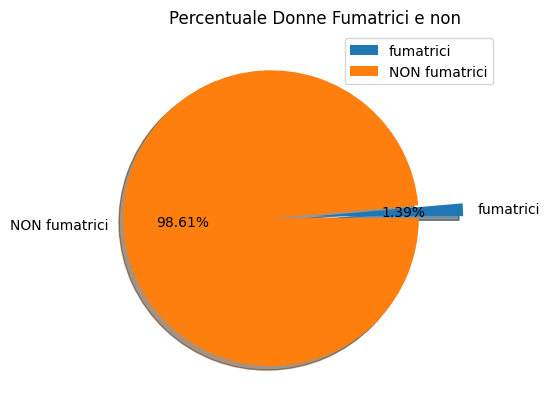

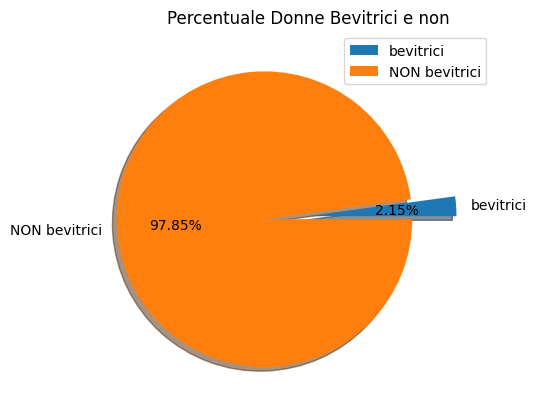

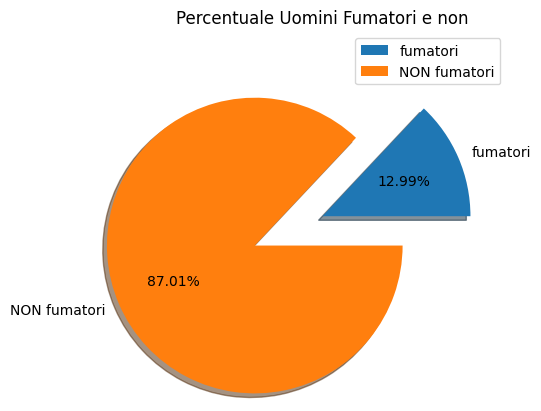

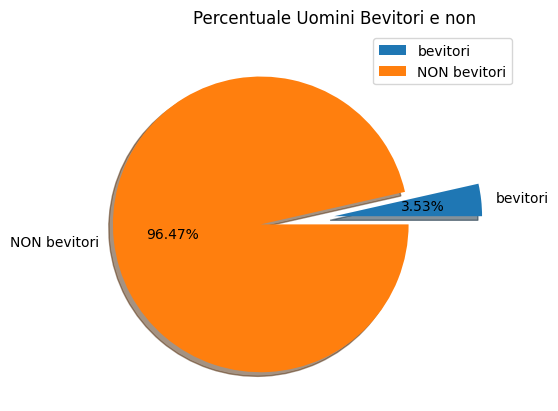

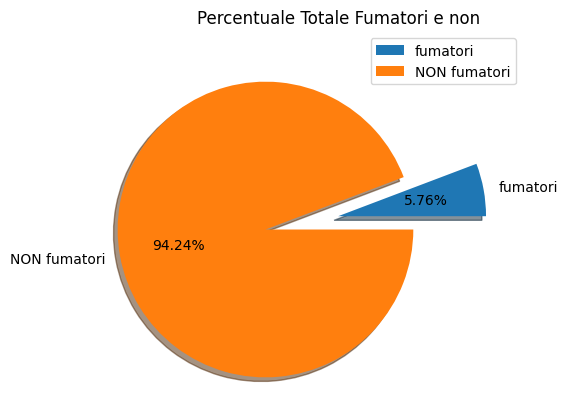

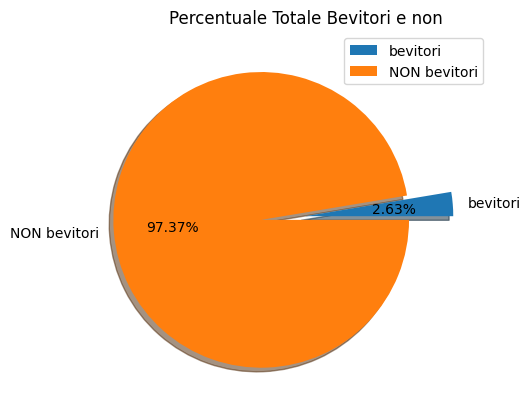

In [192]:
# sex:   1 donne, 2 uomini
# smoke: 1 si,    0 no
# alco:  1 si,    0 no

# def calc_percentage(a, b):
#    return a.shape[0] / b.shape[0] * 100

# uomo
uomini = d.dataset.loc[d.mod_uomo]
# uomo fuma
uomini_fuma = d.getFumatori().loc[d.mod_uomo]
# uomo alco
uomini_alco = d.getBevitori().loc[d.mod_uomo]

# donna
donne = d.dataset.loc[d.mod_donna]
# donna fuma
donne_fuma = d.getFumatori().loc[d.mod_donna]
# donna alco
donne_alco = d.getBevitori().loc[d.mod_donna]

# tot
tot = d.dataset
# tot fuma
tot_fuma = d.getFumatori()
# tot alco
tot_alco = d.getBevitori()
                         
'''
print(f'percentuale donna fuma: {calc_percentage(donne_fuma, donne)} \
        percentuale donna alcol: {calc_percentage(donne_alco, donne)}')
print(f'percentuale uomo fuma: {calc_percentage(uomini_fuma, uomini)} \
      percentuale uomo alcol: {calc_percentage(uomini_alco, uomini)}')
print(f'percentuale tot fuma: {calc_percentage(tot_fuma, tot)} \
        percentuale tot alcol: {calc_percentage(tot_alco, tot)}')
'''

explode = [0,0.3]
explode1 = [0,0.5]
plt.pie(
    [donne_fuma.shape[0], (donne-donne_fuma).shape[0]], 
    labels=['fumatrici', 'NON fumatrici'],
    autopct = '%2.2f%%', #----> stampa delle percentuali 
    shadow = True, explode=explode1
)
plt.legend()
plt.title('Percentuale Donne Fumatrici e non')
plt.show()


plt.pie(
    [donne_alco.shape[0], (donne-donne_alco).shape[0]], 
    labels=['bevitrici', 'NON bevitrici'],
    autopct = '%2.2f%%', #----> stampa delle percentuali 
    shadow = True, explode=explode1
)
plt.legend()
plt.title('Percentuale Donne Bevitrici e non')
plt.show()

plt.pie(
    [uomini_fuma.shape[0], (uomini-uomini_fuma).shape[0]], 
    labels=['fumatori', 'NON fumatori'],
    autopct = '%2.2f%%', #----> stampa delle percentuali 
    shadow = True, explode=explode
)
plt.legend()
plt.title('Percentuale Uomini Fumatori e non')
plt.show()

plt.pie(
    [uomini_alco.shape[0], (uomini-uomini_alco).shape[0]], 
    labels=['bevitori', 'NON bevitori'],
    autopct = '%2.2f%%', #----> stampa delle percentuali 
    shadow = True, explode=explode
)
plt.legend()
plt.title('Percentuale Uomini Bevitori e non')
plt.show()

plt.pie(
    [tot_fuma.shape[0], (tot-tot_fuma).shape[0]], 
    labels=['fumatori', 'NON fumatori'],
    autopct = '%2.2f%%', #----> stampa delle percentuali 
    shadow = True, explode=explode
)
plt.legend()
plt.title('Percentuale Totale Fumatori e non')
plt.show()

plt.pie(
    [tot_alco.shape[0], (tot-tot_alco).shape[0]], 
    labels=['bevitori', 'NON bevitori'],
    autopct = '%2.2f%%', #----> stampa delle percentuali 
    shadow = True, explode=explode1
)
plt.legend()
plt.title('Percentuale Totale Bevitori e non')
plt.show()

# **RICHIESTA 4**


La pressione arteriosa in un individuo si calcola mettendo a rapporto la pressione sistolica (massima) con la pressione diastolica (minima).

\begin{align}
  ap = {  {ap\_hi} \over {ap\_lo}}
\end{align}

* Calcolare la pressione per ogni individuo del dataset e aggiungere la nuova colonna dopo  ap_lo.

* Verificare che il processo non generi anomalie.



*N.B Da qui in poi per "pressione", si intndernno i volri riferiti alla nuova colonna "ap"*



In [185]:
d.dataset = d.dataset[( d.dataset['ap_hi'] > 0) & ( d.dataset['ap_lo'] > 0)]

d.dataset['ap'] = d.dataset['ap_hi'] / d.dataset['ap_lo'] 
d.get_zscore(['ap'])
d.dataset = d.filterByZScore('ap_zscore')
display(d.dataset)


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_zscore,weight_zscore,age_zscore,ap,ap_zscore
31762,45362,39.11,1,164,105.0,150,110,3,3,0,0,1,1,-0.043755,2.139139,-2.105081,1.363636,-0.105467
23691,33868,39.12,2,168,109.0,150,100,1,2,0,1,1,1,0.443452,2.417001,-2.103602,1.500000,-0.035354
38594,55110,39.13,1,156,45.0,110,80,2,1,0,0,0,0,-1.018168,-2.028785,-2.102122,1.375000,-0.099624
45694,65262,39.13,1,156,70.0,100,80,3,3,0,0,0,0,-1.018168,-0.292150,-2.102122,1.250000,-0.163894
53806,76761,39.14,2,165,85.0,140,80,1,1,0,0,1,1,0.078047,0.749831,-2.100643,1.750000,0.093186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36603,52297,64.90,2,163,55.0,120,80,3,1,1,0,1,1,-0.165556,-1.334131,1.710276,1.500000,-0.035354
20931,29892,64.90,1,165,63.0,150,90,2,1,0,0,1,1,0.078047,-0.778408,1.710276,1.666667,0.050339
50714,72373,64.91,2,167,68.0,120,80,2,2,0,0,0,1,0.321650,-0.431081,1.711755,1.500000,-0.035354
68005,97124,64.93,1,178,75.0,120,80,1,1,0,0,1,1,1.661469,0.055177,1.714714,1.500000,-0.035354


# **RICHIESTA 5**

**5.1 media**
* Qual'è la pressione media tra i fumatori e i non fumatori?
* Qual'è la pressione media tra chi consuma e chi non cosuma alcol?

In [186]:
# Per avere i dati relativi ai fumatori bisogna togliere tutti quelli che
# sono anche bevitori perchè non sappiamo quanto alcol e quanto tabacco
# consuma, di conseguenza non sappiamo se la pressione è influenzata piu da 
# fattore rispetto a un altro
# questo ragionamento l'ho applicato a tutti i gruppi e a tutte le richieste 
# Anche nei non fumatori bisogna togliere chi beve altrimenti non si
# puo valutare singolarmente l'impatto sulla pressione

# pressione media non fumatori
non_fum = d.dataset.loc[d.mod_non_smoke & d.mod_non_alco] 

# pressione media fumatori
fum = d.getFumatori()

# pressione media non bevitori
non_alco = non_fum

# pressione media bevitori
alco = d.getBevitori()


print(f'Pressione media fumatori: {fum["ap"].mean()}\nPressione media non fumatori: {non_fum["ap"].mean()}')
print(f'Pressione media bevitori: {alco["ap"].mean()}\nPressione media non bevitori: {non_alco["ap"].mean()}')

Pressione media fumatori: 1.5393540572937279
Pressione media non fumatori: 1.5396585903671975
Pressione media bevitori: 1.5280705820151206
Pressione media non bevitori: 1.5396585903671975


**5.2 varianza**
* Come varia la pressione nei i fumatori?
* Come varia la pressione nei i consumatori di alcol?


In [187]:
varianza_fumo = np.var(d.getFumatori()["ap"])
varianza_alcol = np.var(d.getBevitori()["ap"])

print(f'Varianza pressione fumatori: {varianza_fumo}\nVarianza pressione bevitori: {varianza_alcol}')

Varianza pressione fumatori: 0.05621846591554293
Varianza pressione bevitori: 0.06996743489732402


**5.3 deviazione standard**
* Com' è distribuito il dato della pressione nei fumatori
* Com' è distribuito il dato della pressione nei "bevitori"


In [188]:
std_fumo = np.std(d.getFumatori()["ap"])
std_alcol = np.std(d.getBevitori()["ap"])

print(f'Deviazione standard pressione fumatori: {std_fumo}\nDeviazione standard pressione bevitori: {std_alcol}')

# check 
# print(np.sqrt(varianza_fumo) == std_fumo)
# print(np.sqrt(varianza_alcol) == std_alcol)

Deviazione standard pressione fumatori: 0.2371043355055806
Deviazione standard pressione bevitori: 0.26451358168782946


**5.4 correlazione**
 * Rapportare la pressione dei fumatori e dei "bevitori.
 * Verificare il grado di correlazione
 * Visualizzare il risultato in una matrice di correlazione.


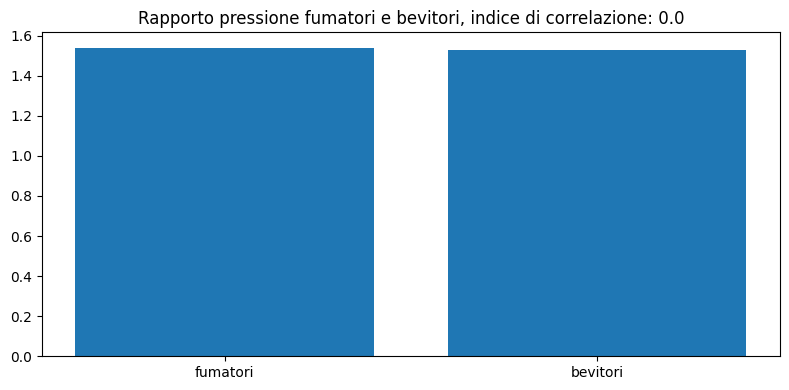

In [189]:
def covariance(a: np.array, b: np.array) -> float:
    ma = np.mean(a)
    mb = np.mean(b)
    return np.sum((a - ma) * (b - mb)) / (a.size - 1)

def correlazione(x: np.array, y: np.array) -> float:
  mu_x = np.mean(x)
  mu_y = np.mean(y)
  cov =  np.sum((x - mu_x) * (y - mu_y))
  return (cov / np.sqrt( np.sum(np.power(x - mu_x, 2)) * np.sum(np.power(y - mu_y, 2)) ))

corr_fum_alco = correlazione(fum["ap"], alco["ap"])

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(['fumatori', 'bevitori'], [fum["ap"].mean(), alco["ap"].mean()])
plt.title(f'Rapporto pressione fumatori e bevitori, indice di correlazione: {corr_fum_alco}')
plt.show()

# **RICHIESTA 6**

* Visualizzare la distribuzione dei valori della pressione di fumatori e consumatori di alcol con le rispettive mededie.


* Visualizzare la distrubuzione dei valori della pressione di fumatori e cosumatori di alcol ed evidenziare i valori critici rispetto alla seguete tabella (ricordarsi di valutare il rapporto sistolica / diastolica).

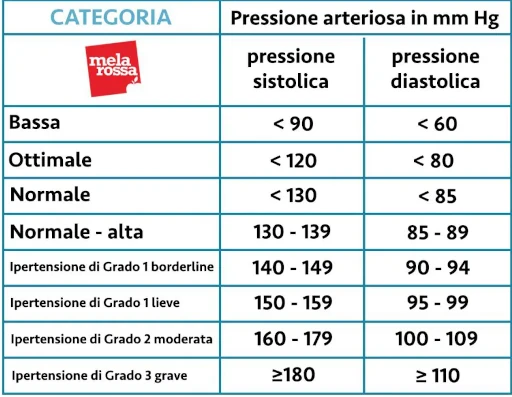

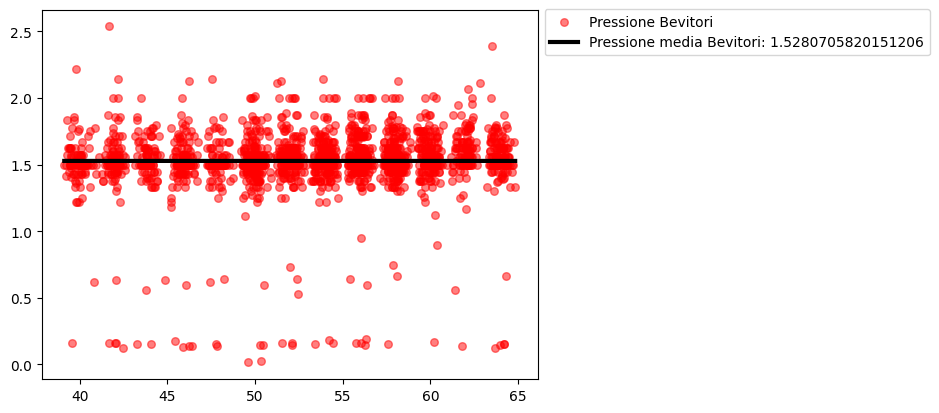

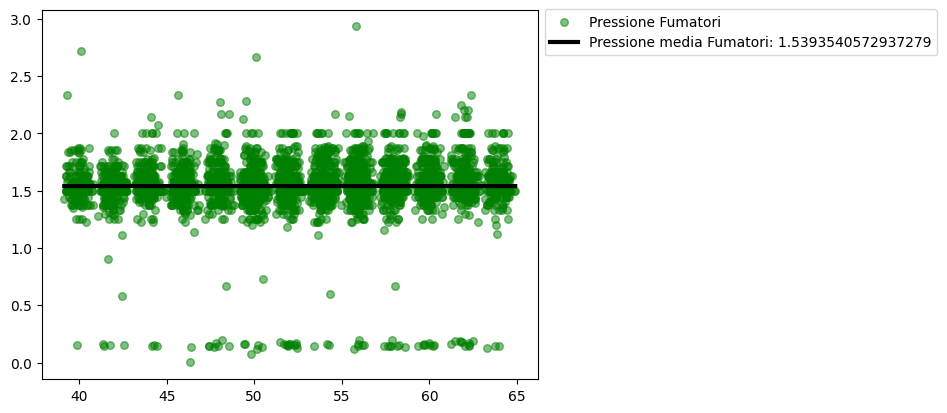

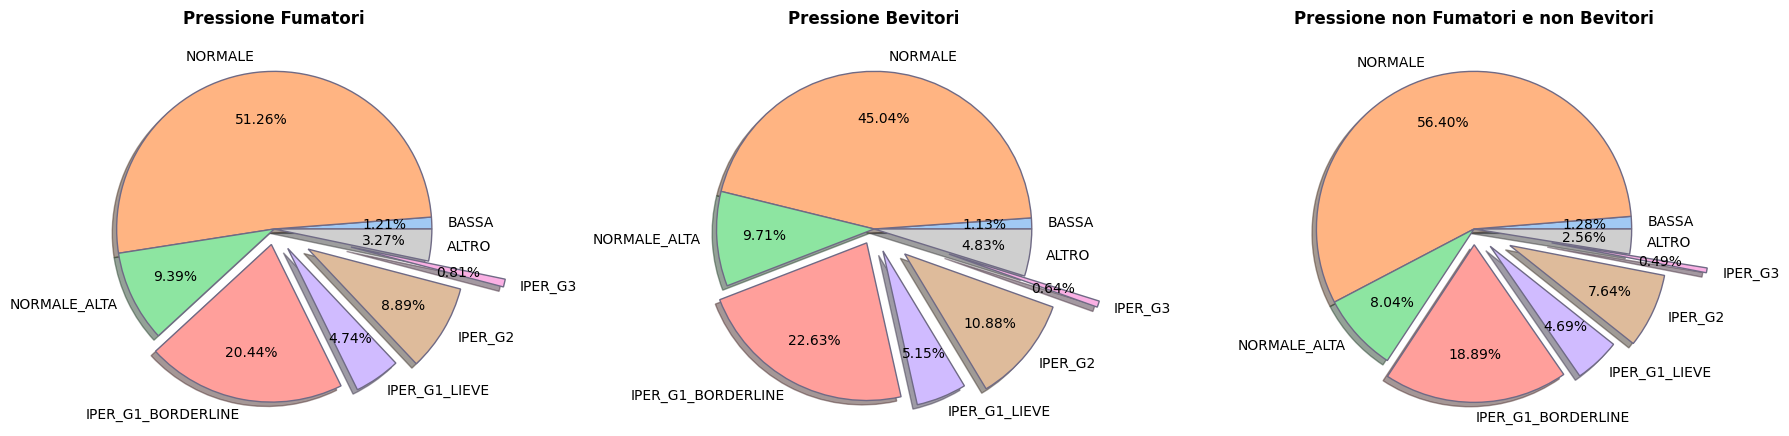

In [191]:
# Inizialmente ho provato a categorizzare tramite ap_hi / ap_lo ma venivano
# dati fuorvianti o sbagliati
'''
d.dataset['score_ap'] = pd.cut(
    d.dataset['ap'], 
    bins=[0, 90/60, 130/85, 139/89, 149/94, 159/99, 179/109, 1000], 
    labels=['bassa','normale','normale-alta','ipertensione g1 borderline','ipertensione g1 lieve', 'ipertensione g2', 'ipertensione g3'])
print(d.dataset[['score_ap', 'ap_hi', 'ap_lo']])
'''

# Ho optato per usare un funzione ed applicarla per ogni record
# in questo modo posso definire una logica custom
# in modo da assegnare uno score coerente

# Nei grafici relativi a chi fuma e chi beve si potrà vedere
# che una fetta maggiore è in ALTRO, vuol dire che i valori sono
# piu 'sballati', non sono classificabili secondo questi parametri 
# Questo vuol dire che non hanno 'inquinato' i dati
# andando in altre categorie

# forse filter zscore su pressione era da fare usando -2.5 e 2.5 ??????????????

from enum import Enum
class sc(Enum): # score pressione
    BASSA = 1
    NORMALE = 2
    NORMALE_ALTA = 3
    IPER_G1_BORDERLINE = 4
    IPER_G1_LIEVE = 5
    IPER_G2 = 6
    IPER_G3 = 7
    ALTRO = float('nan')
    

def calc_score_pressione(p_sis, p_dis):
    if p_sis <= 90 and p_dis <= 60:
        return sc.BASSA
    if p_sis < 130 and p_dis < 85:
        return sc.NORMALE
    if p_sis <= 139 and p_dis <= 89:
        return sc.NORMALE_ALTA
    if p_sis <= 149 and p_dis <= 94:
        return sc.IPER_G1_BORDERLINE
    if p_sis <= 159 and p_dis <= 99:
        return sc.IPER_G1_LIEVE
    if p_sis <= 179 and p_dis <= 109:
        return sc.IPER_G2
    if p_sis > 179 and p_dis > 109:
        return sc.IPER_G3

    return sc.ALTRO

################## DISTRIBUZIONE PRESSIONE ##################
fum['score_pressione'] = d.getFumatori().apply(lambda x: calc_score_pressione(x.ap_hi, x.ap_lo), axis=1)
alco['score_pressione'] = d.getBevitori().apply(lambda x: calc_score_pressione(x.ap_hi, x.ap_lo), axis=1)

no_alco_no_smoke = d.dataset[ d.mod_non_alco & d.mod_non_smoke ]
no_alco_no_smoke['score_pressione'] = no_alco_no_smoke.apply(lambda x: calc_score_pressione(x.ap_hi, x.ap_lo), axis=1)


x1 = d.getBevitori()[ d.dataset['ap'] < 4]
x2 = d.getFumatori()
rette = [alco['ap'].mean(), fum['ap'].mean()]

plt.scatter(x1['age'], x1['ap'], label="Pressione Bevitori", color="red", alpha=0.5, s=30)
plt.plot(x1['age'], np.full(x1['age'].size, rette[0]), color="black", linewidth=3, label= "Pressione media Bevitori: " + str(rette[0]))
plt.legend(bbox_to_anchor=(1., 1.02))
plt.show()

plt.scatter( x2['age'], x2['ap'], label="Pressione Fumatori",  color="green", alpha=0.5, s=30)
plt.plot( x2['age'], np.full( x2['age'].size, rette[1]), color="black", linewidth=3, label= "Pressione media Fumatori: " + str(rette[1]))

plt.legend(bbox_to_anchor=(1., 1.02))
plt.show()



################## DISTRIBUZIONE SCORE PRESSIONE ##################
fig, ax = plt.subplots(1,3, figsize=(18, 13), tight_layout=True)
colors = sns.color_palette('pastel')
categorie = [sc.BASSA, sc.NORMALE, sc.NORMALE_ALTA, sc.IPER_G1_BORDERLINE, sc.IPER_G1_LIEVE, sc.IPER_G2, sc.IPER_G3, sc.ALTRO]
explode_list = [0, 0, 0, 0.1, 0.15, 0.25, 0.5, 0]

pieXall = [len(no_alco_no_smoke[no_alco_no_smoke['score_pressione'] == x]) for x in categorie]
pieXfumatori = [len(fum[fum['score_pressione'] == x]) for x in categorie]
pieXbevitori = [len(alco[alco['score_pressione'] == x]) for x in categorie]

categorie = [x.name for x in categorie]

ax[0].pie(pieXfumatori, labels=categorie, autopct='%2.2f%%', 
          explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True,
          wedgeprops={"linewidth": 1,  "edgecolor":"#6f6a85"} 
)
ax[0].set_title('Pressione Fumatori', weight='bold')


ax[1].pie(pieXbevitori, labels=categorie, autopct='%2.2f%%', 
          explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True,
          wedgeprops={"linewidth": 1,  "edgecolor":"#6f6a85"} 
)
ax[1].set_title('Pressione Bevitori', weight='bold')


ax[2].pie(pieXall, labels=categorie, autopct='%2.2f%%', 
          explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True,
          wedgeprops={"linewidth": 1,  "edgecolor":"#6f6a85"} 
)
ax[2].set_title('Pressione non Fumatori e non Bevitori', weight='bold')
plt.show()
